In [82]:
from models_container.EstimatorsBTC import EstimatorsBTC
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
from typing import List

In [6]:
WINDOWS = ["total", "7", "14", "30"]
INFO_COLS = ["date", "model_name"]
PRECISION_COLS = INFO_COLS + [f"precision_{x}" for x in WINDOWS]
RECALL_COLS = INFO_COLS + [f"recall_{x}" for x in WINDOWS]
ACCURACY_COLS = INFO_COLS + [f"accuracy_{x}" for x in WINDOWS]
SPECIFICITY_COLS = INFO_COLS + [f"specificity_{x}" for x in WINDOWS]
NEG_PRED_COLS = INFO_COLS + [f"neg_pred_value_{x}" for x in WINDOWS]

In [38]:
btc = EstimatorsBTC()
df = btc.modelDB.get_model_performance("AdaBoost")

Skipped date:  2024-07-03


In [39]:
df.head()

,date,model_name,recall_total,precision_total,accuracy_total,specificity_total,neg_pred_value_total,recall_7,precision_7,accuracy_7,specificity_7,neg_pred_value_7,recall_14,precision_14,accuracy_14,specificity_14,neg_pred_value_14,recall_30,precision_30,accuracy_30,specificity_30,neg_pred_value_30
0,2024-03-01,AdaBoost,0.607143,0.560440,0.513333,0.393939,0.440678,1.0,0.833333,0.857143,0.500000,1.0,1.0,0.615385,0.642857,0.166667,1.0,0.800000,0.666667,0.600000,0.200000,0.333333
1,2024-03-02,AdaBoost,0.611765,0.565217,0.516556,0.393939,0.440678,1.0,0.833333,0.857143,0.500000,1.0,1.0,0.615385,0.642857,0.166667,1.0,0.850000,0.680000,0.633333,0.200000,0.400000
2,2024-03-03,AdaBoost,0.616279,0.569892,0.519737,0.393939,0.440678,1.0,0.833333,0.857143,0.500000,1.0,1.0,0.692308,0.714286,0.200000,1.0,0.857143,0.720000,0.666667,0.222222,0.400000
3,2024-03-04,AdaBoost,0.616279,0.563830,0.516340,0.388060,0.440678,1.0,0.666667,0.714286,0.333333,1.0,1.0,0.615385,0.642857,0.166667,1.0,0.857143,0.692308,0.633333,0.111111,0.250000
4,2024-03-05,AdaBoost,0.620690,0.568421,0.519481,0.388060,0.440678,1.0,0.666667,0.714286,0.333333,1.0,1.0,0.692308,0.714286,0.200000,1.0,0.904762,0.703704,0.666667,0.111111,0.333333


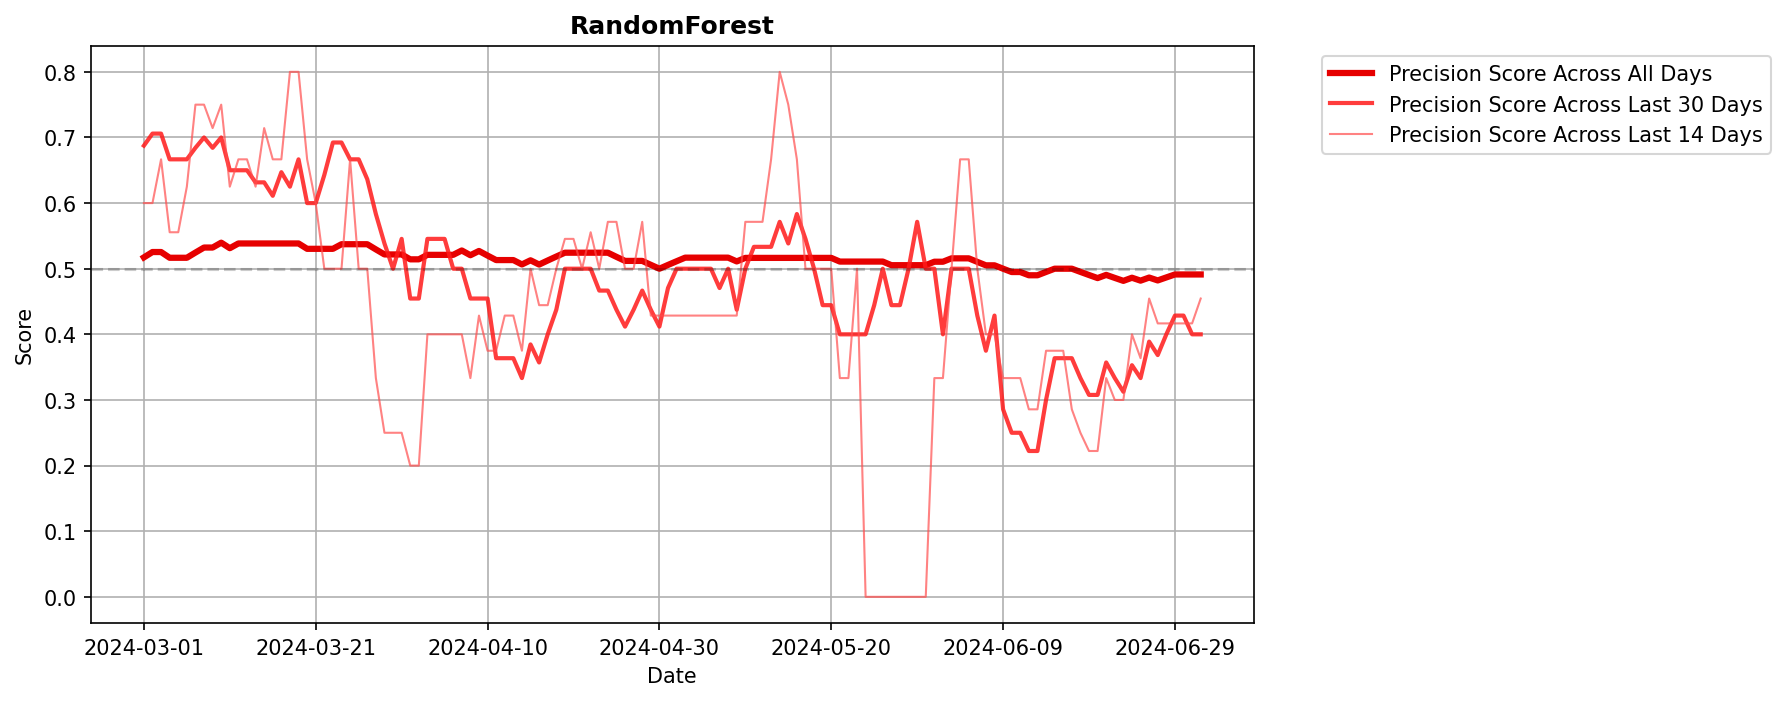

In [170]:
def get_plot(estimator: str, metrics: List[str], windows: List[str]):
    colormaps = {"recall": ["#3333ff", "#6666ff", "#9999ff", "#ccccff"],
                 "precision": ["#e60000", "#ff1a1a", "#ff4d4d", "#ff8080"],
                 "accuracy": ["#00cc00", "#00ff00", "#33ff33", "#66ff66"],
                 "specificity": ["#663300", "#994d00", "#cc6600", "#ff8000"],
                 "neg_pred_value": ["#990099", "#cc00cc", "#ff00ff", "#ff33ff"]}

    labels = []
    df = btc.modelDB.get_model_performance(estimator)
    fig, ax = plt.subplots(figsize=(10,5), dpi=150)
    for idx, metric in enumerate(metrics):
        for idx_lwa, window in enumerate(windows):
            df[["date", f"{metric}_{window}"]].plot(x="date", ax=ax, linewidth=len(windows)-idx_lwa, c=colormaps[metric][idx_lwa], alpha=1 - idx_lwa*0.15)
            labels.append(f"{metric.capitalize()} Score Across {'Last ' + window if window != 'total' else 'All'} Days")

    plt.axhline(0.5, linestyle="--", color="black", alpha=0.2)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', labels=labels)
    ax.set_title(estimator, weight="bold")
    ax.set_xlabel("Date")
    ax.set_ylabel("Score")

    return fig

get_plot("RandomForest", ["precision"], ["total", "30", "14"])

plt.show()

In [171]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   results_playground.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [172]:
!git add .

In [173]:
!git commit -m "Plot creator"

[master 075c029] Plot creator
 1 file changed, 120 insertions(+), 12 deletions(-)


In [174]:
!git push origin master

To github.com:milonpabis/crypto-eye.git
   6317670..075c029  master -> master
